# Análise exploratória dos dados de convênios do governo federal (Parte 1)

Os dados utilizados nesta análise foram obtidos no Portal da Transparência, na [área de dados abertos](http://www.transparencia.gov.br/download-de-dados), e no momento do download estavam atualizados até 19 de abril de 2019. Estou deixando os dados originais neste repositório também. 

## Tópicos

1. **Importando os dados**
- **Entendendo a estrutura dos dados**
    - Qual é o tamanho da base?
    - Quais são as colunas e que tipo de dados contêm?
    - Que tipos de convênios?
    - Que status de convênios são possíveis?
    - Bônus: Pandas Profiling
- **Tratamento dos dados**
    - Convertendo os formatos de data
    - Removendo os valores discrepantes
- **Cruzando com a base de ordem bancária**
- **Algunas análises básicas**
    - Quanto foi liberado por tipo de convênio em toda a série histórica?
    - Quanto foi liberado por ano no total?
- **Algumas sugestões de melhoria para publicação dos dados**
- **Resumo da Ópera**

Os dados utilizados nesta análise foram obtidos no Portal da Transparência, na [área de dados abertos](http://www.transparencia.gov.br/download-de-dados), e no momento do download estavam atualizados até 19 de abril de 2019. 

![print do portal](print_portal1.png)

O arquivo compactado vem com duas planilhas em formato .csv. De acordo com a seção ["Origem dos dados"](http://www.transparencia.gov.br/origem-dos-dados ), as fontes são: 

* **Convênios** - Extraído do SICONV - Sistema de Convênios do ex-Ministério do Planejamento, Desenvolvimento e Gestão (hoje integrante do Ministério da Economia). 
* **Ordem Bancária** - Extraído do SIAFI - Sistema Integrado de Administração Financeira, da Secretaria do Tesouro Nacional.

Um dicionário de variáveis para ambas as bases está disponível [neste link](http://www.portaldatransparencia.gov.br/pagina-interna/603415-dicionario-de-dados-convenios).  

## Importando os dados

In [2]:
%matplotlib inline 

import pandas as pd
import seaborn as sns 
import pandas_profiling #esse pacote não vem instalado por padrão no Anaconda; fazer instalação antes

O comando abaixo importa o arquivo no formato dataframe do pandas; configura o separador como ';', o dígito de decimais para ',', de forma que reconheça como campo numérico e a codificação, que por padrão é UTF-8:

In [4]:
conv_df = pd.read_csv('20190419_Convenios.csv', sep=';', decimal=',', encoding='ISO-8859-1')

In [5]:
conv_df.head()

#visualiza as cinco primeiras linhas do arquivo importado

,NÚMERO CONVÊNIO,UF,CÓDIGO SIAFI MUNICÍPIO,NOME MUNICÍPIO,SITUAÇÃO CONVÊNIO,NÚMERO ORIGINAL,OBJETO DO CONVÊNIO,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO CONCEDENTE,...,TIPO ENTE CONVENENTE,TIPO INSTRUMENTO,VALOR CONVÊNIO,VALOR LIBERADO,DATA PUBLICAÇÃO,DATA INÍCIO VIGÊNCIA,DATA FINAL VIGÊNCIA,VALOR CONTRAPARTIDA,DATA ÚLTIMA LIBERAÇÃO,VALOR ÚLTIMA LIBERAÇÃO
0,104141,SP,6689,MAUA,CONCLUÍDO,2467/94/FAE,CONVENIO CELEBRADO ENTRE A FAE E A PM DE MAUA/...,26000,Ministério da Educação,26298,...,Municipal,Sem informação,2110457.00,2054267.71,28/03/1996,28/02/1996,28/02/1999,0.0,07/12/1995,0.00
1,104773,RS,8963,VIAMAO,ADIMPLENTE,2520/94/FAE,CONVENIO CELEBRADO ENTRE A FAE E P.M. DE VIAMA...,26000,Ministério da Educação,26298,...,Municipal,CONVENIO,515877.96,406200.76,19/03/1996,27/02/1996,28/02/1999,0.0,13/12/1995,0.00
2,112236,PE,2531,RECIFE,CONCLUÍDO,PG 096/94-00,EXECUCAO DE OBRAS E SERVICOS DE CONSTRUCAO ROD...,39000,"Ministério dos Transportes, Portos e Aviação C...",39252,...,Municipal,Sem informação,19439537.00,17777924.41,24/12/1999,15/11/2002,28/06/2005,0.0,28/12/2004,0.00
3,116570,SP,6219,BAURU,CONCLUÍDO,1640/94,PROSSEGUIMENTO A OBRA DA NOVA UNIDADE DE INTER...,36000,Ministério da Saúde,36000,...,Estadual,Sem informação,5000000.00,5000000.00,27/02/1998,29/12/1995,30/06/1998,0.0,29/12/1994,0.00
4,120304,RJ,6001,RIO DE JANEIRO,CONCLUÍDO,01/93 8/9. T.A.,SUPLEMENTACAO DE RECURSOS A FIM DE CUMPRIR OS ...,36000,Ministério da Saúde,36201,...,Estadual,Sem informação,12741999.13,11415402.92,21/12/2000,24/11/1995,28/02/2002,0.0,19/12/2001,153846.11


## Entendendo a estrutura dos dados

### Qual é o tamanho da base?

In [6]:
conv_df.shape

# mostra a quantidade de registros (516.580 linhas) e colunas disponíveis

(516580, 23)

In [7]:
conv_df.index

RangeIndex(start=0, stop=516580, step=1)

### Quais são as colunas e que tipo de dados contêm?

In [8]:
conv_df.dtypes

#mostra as colunas existentes e seus respectivos formatos

NÚMERO CONVÊNIO              int64
UF                          object
CÓDIGO SIAFI MUNICÍPIO       int64
NOME MUNICÍPIO              object
SITUAÇÃO CONVÊNIO           object
NÚMERO ORIGINAL             object
OBJETO DO CONVÊNIO          object
CÓDIGO ÓRGÃO SUPERIOR        int64
NOME ÓRGÃO SUPERIOR         object
CÓDIGO ÓRGÃO CONCEDENTE      int64
NOME ÓRGÃO CONCEDENTE       object
CÓDIGO CONVENENTE           object
NOME CONVENENTE             object
TIPO ENTE CONVENENTE        object
TIPO INSTRUMENTO            object
VALOR CONVÊNIO             float64
VALOR LIBERADO             float64
DATA PUBLICAÇÃO             object
DATA INÍCIO VIGÊNCIA        object
DATA FINAL VIGÊNCIA         object
VALOR CONTRAPARTIDA        float64
DATA ÚLTIMA LIBERAÇÃO       object
VALOR ÚLTIMA LIBERAÇÃO     float64
dtype: object

### Que tipos de convênios?

In [9]:
conv_df['TIPO ENTE CONVENENTE'].unique()

array(['Municipal', 'Estadual'], dtype=object)

Este ponto me chamou a atenção. Estão faltando os outros tipos (se Administração Pública, Entidade Sem Fins Lucrativos, Entidades Empresariais Privadas, Pessoa Física etc.). Volto ao ponto mais adiante.

In [10]:
conv_df['TIPO INSTRUMENTO'].unique()

array(['Sem informação', 'CONVENIO', 'CONTRATO DE REPASSE',
       'TERMO DE PARCERIA', 'ACORDO DE COOPERACAO TECNICA',
       'TERMO DE COMPROMISSO', 'TRANSFERENCIA LEGAL', 'Não se aplica'],
      dtype=object)

### Quais status de convênio são possíveis?

In [11]:
conv_df['SITUAÇÃO CONVÊNIO'].unique()

array(['CONCLUÍDO', 'ADIMPLENTE', 'BAIXADO', 'INADIMPLÊNCIA SUSPENSA',
       'ARQUIVADO', 'EXCLUÍDO', 'INADIMPLENTE', 'RESCINDIDO', 'CANCELADO',
       'PRESTAÇÃO DE CONTAS REJEITADA',
       'PRESTAÇÃO DE CONTAS ENVIADA PARA ANÁLISE',
       'PRESTAÇÃO DE CONTAS EM COMPLEMENTAÇÃO',
       'PRESTAÇÃO DE CONTAS APROVADA', 'PRESTAÇÃO DE CONTAS EM ANÁLISE',
       'NORMAL', 'PRESTAÇÃO DE CONTAS APROVADA COM RESSALVAS',
       'CONVÊNIO ANULADO', 'AGUARDANDO PRESTAÇÃO DE CONTAS',
       'EM EXECUÇÃO', 'PRESTAÇÃO DE CONTAS INICIADA POR ANTECIPAÇÃO'],
      dtype=object)

### Bônus: Pandas Profiling 

Este recurso poupa bastante trabalho na análise exploratória (inclusive alguns passos que eu já havia feito anteriormente), embora muitas das informações geradas não façam sentido para a análise (por exemplo, fazer média de uma variável que é categórica, como o código de município).

In [259]:
pandas_profiling.ProfileReport(conv_df)

Number of variables,23
Number of observations,516580
Total Missing (%),0.8%
Total size in memory,90.6 MiB
Average record size in memory,184.0 B
Numeric,8
Categorical,15
Boolean,0
Date,0
Text (Unique),0
Rejected,0


Olhando para esses resultados, surgem alguns pontos interessantes:

* Pela contagem de valores únicos do código do convenente, temos que **existem 42.678 entes/organizações únicos** no universo de mais de 500 mil registros - ou **8.3%** dos registros

* Ministério da Saúde, da Educação e do Desenvolvimento Regional são os que tiveram maior quantidade de convênios

* 52.3% dos convênios da base estão **concluídos**

* Há um alto grau (80.8%) de registros preenchidos como **"Sem informação"** e **"Não se aplica"** no campo de "TIPO DE INSTRUMENTO", a analisar por quê.

* O Valor Máximo de contrapartida é 9.461.500.000 (9,4 tri!) e provavelmente está errado. Deverá ser tirado da análise para não distorcer os gráficos. 

* O mesmo acontece com o Valor do Convênio: o registro máximo possui valor de 14.043.000.000 (14 tri); e Valor Liberado: 8.246.200.000 (8,2 tri). 

_PS: chequei esses valores no Portal da Transparência e também estão altos por lá quando se consulta a tabela. Mas para fazer os gráficos eles provavelmente foram tratados, pois a soma total é da ordem de 15bi_

## Tratamento dos dados

A primeira correção necessária para lidar com os dados é a conversão das colunas de data em formato que o pandas possa reconhecer. No caso dos campos numéricos que tratam de valor, a correção não será necessária porque no momento de importar os dados foi informado que o dígito decimal é uma vírgula, e as colunas já foram importadas corretamente como 'float'.

### Convertendo os formatos de data

In [12]:
cols_data = ['DATA PUBLICAÇÃO','DATA INÍCIO VIGÊNCIA', 'DATA FINAL VIGÊNCIA', 'DATA ÚLTIMA LIBERAÇÃO']

#seleciona apenas as colunas com informação sobre data

In [13]:
conv_df[cols_data] = conv_df[cols_data].apply(pd.to_datetime, errors='coerce')

### Removendo os valores discrepantes

In [14]:
conv_df.sort_values(by=['VALOR CONVÊNIO'], ascending=False).head()

#Visualiza os maiores valores

,NÚMERO CONVÊNIO,UF,CÓDIGO SIAFI MUNICÍPIO,NOME MUNICÍPIO,SITUAÇÃO CONVÊNIO,NÚMERO ORIGINAL,OBJETO DO CONVÊNIO,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO CONCEDENTE,...,TIPO ENTE CONVENENTE,TIPO INSTRUMENTO,VALOR CONVÊNIO,VALOR LIBERADO,DATA PUBLICAÇÃO,DATA INÍCIO VIGÊNCIA,DATA FINAL VIGÊNCIA,VALOR CONTRAPARTIDA,DATA ÚLTIMA LIBERAÇÃO,VALOR ÚLTIMA LIBERAÇÃO
220068,521614,DF,9701,BRASILIA,CONCLUÍDO,TCV/001/MDS/2005,DESTINADO A TRANSFERENCIA DE RECURSOS ORÇAMENT...,55000,Ministério da Cidadania,55001,...,Municipal,Sem informação,1.404310e+10,0.000000e+00,2005-01-02,2005-01-02,2007-05-02,0.0,2006-12-15,0.0
284634,588595,DF,9701,BRASILIA,CONCLUÍDO,PORT.INTERM.05/2007,APROVA O PLANO DE TRABALHO QUE TRATA DA DESCEN...,55000,Ministério da Cidadania,55001,...,Municipal,Sem informação,1.354944e+10,0.000000e+00,2007-01-26,2007-01-26,2009-01-31,0.0,2008-12-30,0.0
368229,675336,DF,9701,BRASILIA,ADIMPLENTE,T.C - 80º,FIRMAR A COOPERAçãO TéCNICA ENTRE O MINISTÉRIO...,36000,Ministério da Saúde,36000,...,Municipal,ACORDO DE COOPERACAO TECNICA,9.086468e+09,8.246233e+09,2013-08-14,2013-04-26,2023-04-26,0.0,2018-10-15,245600000.0
197520,498455,DF,9701,BRASILIA,CONCLUÍDO,TC/MDSCF/1607/2004,DESCENTRALIZAçãO DE CREDITOS PARA O INSTITUTO ...,55000,Ministério da Cidadania,55001,...,Municipal,Sem informação,7.579889e+09,0.000000e+00,2004-01-29,2004-01-29,2005-03-31,0.0,2005-12-15,0.0
255303,559088,DF,9701,BRASILIA,CONCLUÍDO,PORT INTERM. 01/06,CONSTITUI OBJETO DO PRESENTE CONVENIO O ESTABE...,55000,Ministério da Cidadania,55001,...,Municipal,Sem informação,7.299618e+09,0.000000e+00,2006-01-06,2006-03-05,2006-12-31,0.0,2008-09-26,0.0


In [15]:
conv_df_clean = conv_df.drop([220068, 284634])

#Remove as duas primeiras linhas que parecem estar com erro no valor (ordem de trilhões)

## Cruzando com a base de ordem bancária

A base de convênios, na forma como está organizada, não é suficiente para entender quanto foi transferido para cada convênio ao longo do tempo.Isso porque a coluna 'Valor Liberado' parece acumular o montante transferido em todo o período de vigência do convênio. Para permitir análises desse tipo, vamos trazer também para o DataFrame a planilha de Ordens Bancárias, a partir do cruzamento com o Número do Convênio. 

In [16]:
ob_df = pd.read_csv('20190419_Convenios_OrdensBancarias.csv', sep=';', decimal=',', encoding='ISO-8859-1')

In [17]:
ob_df.head()

,NÚMERO CONVÊNIO,NÚMERO ORIGINAL,DATA EMISSÃO OB,NÚMERO DA ORDEM BANCÁRIA,VALOR LIBERADO
0,101231,000694,15/06/1994,193099192111994OB003778,363.63
1,101231,000694,26/07/1994,193099192111994OB004794,2000.00
2,101231,000694,17/08/1994,193099192111994OB005257,5000.00
3,101231,000694,14/11/1994,193099192111994OB007298,5000.00
4,101231,000694,04/12/1995,193099192111995OB007379,13560.00


In [18]:
ob_df.dtypes

NÚMERO CONVÊNIO               int64
NÚMERO ORIGINAL              object
DATA EMISSÃO OB              object
NÚMERO DA ORDEM BANCÁRIA     object
VALOR LIBERADO              float64
dtype: object

In [19]:
ob_df['DATA EMISSÃO OB'] = ob_df['DATA EMISSÃO OB'].apply(pd.to_datetime, errors='coerce')
#converte a coluna de data de objeto para o formato de data

In [20]:
ob_df.head()

,NÚMERO CONVÊNIO,NÚMERO ORIGINAL,DATA EMISSÃO OB,NÚMERO DA ORDEM BANCÁRIA,VALOR LIBERADO
0,101231,000694,1994-06-15,193099192111994OB003778,363.63
1,101231,000694,1994-07-26,193099192111994OB004794,2000.00
2,101231,000694,1994-08-17,193099192111994OB005257,5000.00
3,101231,000694,1994-11-14,193099192111994OB007298,5000.00
4,101231,000694,1995-04-12,193099192111995OB007379,13560.00


In [21]:
conv_ob_df = conv_df_clean.merge(ob_df,
                                 how = 'left',
                                 left_on= 'NÚMERO CONVÊNIO',
                                 right_on= 'NÚMERO CONVÊNIO')

In [22]:
conv_ob_df['ANO_OB'] = conv_ob_df['DATA EMISSÃO OB'].dt.year
#cria uma coluna apenas com os anos

In [23]:
conv_ob_df['MES_OB'] = conv_ob_df['DATA EMISSÃO OB'].dt.month
#cria uma coluna apenas com os meses

In [24]:
conv_ob_df.columns

Index(['NÚMERO CONVÊNIO', 'UF', 'CÓDIGO SIAFI MUNICÍPIO', 'NOME MUNICÍPIO',
       'SITUAÇÃO CONVÊNIO', 'NÚMERO ORIGINAL_x', 'OBJETO DO CONVÊNIO',
       'CÓDIGO ÓRGÃO SUPERIOR', 'NOME ÓRGÃO SUPERIOR',
       'CÓDIGO ÓRGÃO CONCEDENTE', 'NOME ÓRGÃO CONCEDENTE', 'CÓDIGO CONVENENTE',
       'NOME CONVENENTE', 'TIPO ENTE CONVENENTE', 'TIPO INSTRUMENTO',
       'VALOR CONVÊNIO', 'VALOR LIBERADO_x', 'DATA PUBLICAÇÃO',
       'DATA INÍCIO VIGÊNCIA', 'DATA FINAL VIGÊNCIA', 'VALOR CONTRAPARTIDA',
       'DATA ÚLTIMA LIBERAÇÃO', 'VALOR ÚLTIMA LIBERAÇÃO', 'NÚMERO ORIGINAL_y',
       'DATA EMISSÃO OB', 'NÚMERO DA ORDEM BANCÁRIA', 'VALOR LIBERADO_y',
       'ANO_OB', 'MES_OB'],
      dtype='object')

In [25]:
conv_ob_df = conv_ob_df.rename(columns={'VALOR LIBERADO_x': 'VALOR ACUMULADO',
                                        'VALOR LIBERADO_y': 'VALOR LIBERADO_OB'})

In [26]:
cols_df = ['NÚMERO CONVÊNIO', 'UF', 'CÓDIGO SIAFI MUNICÍPIO', 'NOME MUNICÍPIO', 'SITUAÇÃO CONVÊNIO', 'OBJETO DO CONVÊNIO',
           'CÓDIGO ÓRGÃO SUPERIOR', 'NOME ÓRGÃO SUPERIOR', 'CÓDIGO ÓRGÃO CONCEDENTE', 'NOME ÓRGÃO CONCEDENTE', 
           'CÓDIGO CONVENENTE','NOME CONVENENTE', 'TIPO ENTE CONVENENTE', 'TIPO INSTRUMENTO', 
           'DATA PUBLICAÇÃO', 'DATA INÍCIO VIGÊNCIA', 'DATA FINAL VIGÊNCIA', 'DATA ÚLTIMA LIBERAÇÃO', 'DATA EMISSÃO OB',
           'VALOR CONVÊNIO', 'VALOR ACUMULADO', 'VALOR CONTRAPARTIDA','VALOR LIBERADO_OB', 
           'ANO_OB', 'MES_OB']

#seleciona e ordena colunas para novo dataframe

In [27]:
conv_ob_df_clean = conv_ob_df[cols_df]
conv_ob_df_clean.head()

,NÚMERO CONVÊNIO,UF,CÓDIGO SIAFI MUNICÍPIO,NOME MUNICÍPIO,SITUAÇÃO CONVÊNIO,OBJETO DO CONVÊNIO,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO CONCEDENTE,NOME ÓRGÃO CONCEDENTE,...,DATA INÍCIO VIGÊNCIA,DATA FINAL VIGÊNCIA,DATA ÚLTIMA LIBERAÇÃO,DATA EMISSÃO OB,VALOR CONVÊNIO,VALOR ACUMULADO,VALOR CONTRAPARTIDA,VALOR LIBERADO_OB,ANO_OB,MES_OB
0,104141,SP,6689,MAUA,CONCLUÍDO,CONVENIO CELEBRADO ENTRE A FAE E A PM DE MAUA/...,26000,Ministério da Educação,26298,Fundo Nacional de Desenvolvimento da Educação,...,1996-02-28,1999-02-28,1995-07-12,NaT,2110457.00,2054267.71,0.0,NaN,NaN,NaN
1,104773,RS,8963,VIAMAO,ADIMPLENTE,CONVENIO CELEBRADO ENTRE A FAE E P.M. DE VIAMA...,26000,Ministério da Educação,26298,Fundo Nacional de Desenvolvimento da Educação,...,1996-02-27,1999-02-28,1995-12-13,NaT,515877.96,406200.76,0.0,NaN,NaN,NaN
2,112236,PE,2531,RECIFE,CONCLUÍDO,EXECUCAO DE OBRAS E SERVICOS DE CONSTRUCAO ROD...,39000,"Ministério dos Transportes, Portos e Aviação C...",39252,Departamento Nacional de Infraestrutura de Tra...,...,2002-11-15,2005-06-28,2004-12-28,NaT,19439537.00,17777924.41,0.0,NaN,NaN,NaN
3,116570,SP,6219,BAURU,CONCLUÍDO,PROSSEGUIMENTO A OBRA DA NOVA UNIDADE DE INTER...,36000,Ministério da Saúde,36000,Ministério da Saúde - Unidades com vínculo direto,...,1995-12-29,1998-06-30,1994-12-29,NaT,5000000.00,5000000.00,0.0,NaN,NaN,NaN
4,120304,RJ,6001,RIO DE JANEIRO,CONCLUÍDO,SUPLEMENTACAO DE RECURSOS A FIM DE CUMPRIR OS ...,36000,Ministério da Saúde,36201,Fundação Oswaldo Cruz,...,1995-11-24,2002-02-28,2001-12-19,1996-12-13,12741999.13,11415402.92,0.0,-151160.23,1996.0,12.0


## Algumas análises básicas

vou deixar as análises para a Parte 2 desde tutorial. A seguir, apenas algumas análises ainda com objetivo de explorar a situação da base de dados.

### Quanto foi liberado por tipo de convênio em toda a série histórica? 

In [28]:
conv_tipo = conv_ob_df_clean.groupby(['TIPO INSTRUMENTO'])['VALOR LIBERADO_OB'].sum()
conv_tipo

TIPO INSTRUMENTO
ACORDO DE COOPERACAO TECNICA    1.297433e+10
CONTRATO DE REPASSE             1.476726e+10
CONVENIO                        4.234254e+10
Não se aplica                   6.615595e+10
Sem informação                  9.062859e+10
TERMO DE COMPROMISSO            4.574876e+10
TERMO DE PARCERIA               2.847792e+08
TRANSFERENCIA LEGAL             1.594627e+09
Name: VALOR LIBERADO_OB, dtype: float64

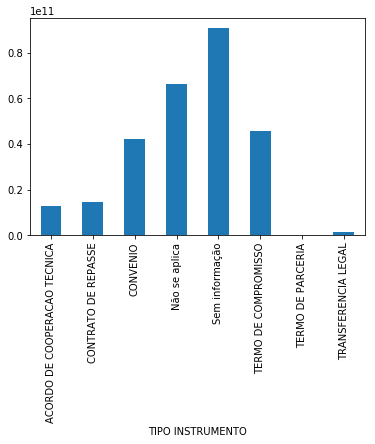

In [29]:
conv_tipo.plot.bar()

"Não se aplica" e "Sem informação" não parecem seguir um padrão para o tipo de convênio a que se referem. E são mais frequentes pré-2001. 

No período houve uma mudança importante na legislação: o Marco Regulatório das OSCs. O nome Termo de Parceria (introduzido na nova legislação, a partir de 2016, aparece já em 2003. Era outro tipo de instrumento ou foi feito um "DE-PARA" na base de dados para instrumentos anteriores? Seria importante a base vir contextualizada dessa informação. 

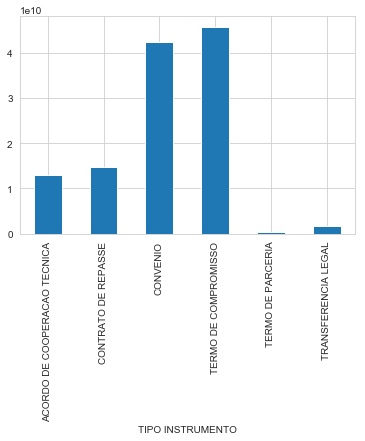

In [41]:
conv_tipo_clean = conv_tipo.drop(['Não se aplica', "Sem informação"])
conv_tipo_clean.plot.bar()

#Sem os tipos "Não se aplica" e "Sem informação"

### Quanto foi liberado em convênios por ano e por tipo de convênio? 

In [30]:
conv_ano_tipo = conv_ob_df_clean.groupby([conv_ob_df_clean['DATA EMISSÃO OB'].dt.year, 'TIPO INSTRUMENTO'])['VALOR LIBERADO_OB'].sum()

In [31]:
conv_ano_tipo

DATA EMISSÃO OB  TIPO INSTRUMENTO            
1995.0           CONVENIO                        4.639720e+06
                 Sem informação                  2.270675e+07
1996.0           CONVENIO                        1.844257e+08
                 Sem informação                  2.237020e+09
1997.0           CONVENIO                        1.541994e+08
                 Sem informação                  2.694562e+09
1998.0           CONVENIO                        4.097765e+08
                 Sem informação                  4.543074e+09
1999.0           ACORDO DE COOPERACAO TECNICA    2.500000e+06
                 CONTRATO DE REPASSE             2.453811e+07
                 CONVENIO                        4.471156e+08
                 Sem informação                  4.624955e+09
2000.0           ACORDO DE COOPERACAO TECNICA    6.816500e+06
                 CONTRATO DE REPASSE             8.959852e+06
                 CONVENIO                        5.838415e+08
                 Sem inf

### Quanto foi liberado em convênios no total por ano? 

In [34]:
conv_ano = conv_ob_df_clean.groupby(conv_ob_df_clean['DATA EMISSÃO OB'].dt.year)['VALOR LIBERADO_OB'].sum()
conv_ano

DATA EMISSÃO OB
1995.0    2.734647e+07
1996.0    2.421446e+09
1997.0    2.848762e+09
1998.0    4.952850e+09
1999.0    5.099109e+09
2000.0    6.476433e+09
2001.0    7.552949e+09
2002.0    9.667288e+09
2003.0    3.489305e+09
2004.0    7.068232e+09
2005.0    7.288592e+09
2006.0    1.009364e+10
2007.0    1.172700e+10
2008.0    1.640954e+10
2009.0    1.614317e+10
2010.0    2.014626e+10
2011.0    1.695974e+10
2012.0    1.997892e+10
2013.0    1.773351e+10
2014.0    1.941670e+10
2015.0    1.478654e+10
2016.0    1.947484e+10
2017.0    1.761259e+10
2018.0    1.408487e+10
2019.0    3.037217e+09
Name: VALOR LIBERADO_OB, dtype: float64

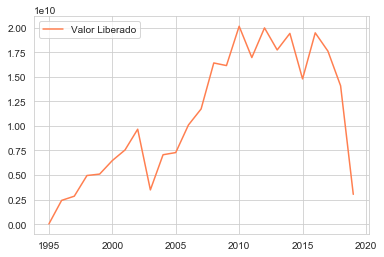

In [39]:
sns.set_style("whitegrid")

ax = sns.lineplot(data=conv_ano, color="coral", label="Valor Liberado")

## Algumas sugestões de melhoria para publicação dos dados


1. Rever os valores discrepantes e muito provavelmente equivocados (acima de bilhão e sobretudo trilhão)
2. Incluir documento (nota técnica) ou endereço de página web que possa contextualizar o funcionamento dos convênios e a legislação relacionada, mudanças ao longo dos anos etc (ex: Termo de Parceria é pós-MROSC ou a nomenclatura de anos anteriores foi substituída também?)
3. No dicionário de dados, detalhar o significado de cada categoria da coluna 'SITUAÇÃO DO CONVÊNIO'.
4. No dicionário de dados, falta especificar a coluna 'TIPO INSTRUMENTO' e detalhar as categorias existentes. Por que em gramde parte está não se aplica ou está com 'Sem informação'?
4. Importante: está faltando uma coluna importante no dataset! "Tipo Convenente" - Tem apenas para tipo de ente federado (se estado ou município). Falta coluna que diga se é organização social, etc.
4. Rever o nome das variáveis para minúsculas, sem espaços e caracteres especiais (boa prática)

### Mais análises na Parte 2 - em breve!